**IRIS Flower Classification using PCA**

**This program loads the Iris dataset, performs PCA on the scaled features, visualizes the PCA scores in a 3D scatter plot, and distinguishes different species by colors.**

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


**Assign the feature and target variable(s) to X and Y**

In [16]:
X = iris.data
Y = iris.target

In [17]:
X = scale(X) #to scale down features

**Importing the PCA library as decomposition**

In [18]:
from sklearn.preprocessing import scale 
from sklearn import decomposition 
import pandas as pd

In [20]:
pca = decomposition.PCA(n_components=3) #consider this example with 3 components
pca.fit(X)

PCA(n_components=3)

**"Scores" refer to the transformed data points in the new coordinate system defined by the principal components.**

**When we apply PCA to a dataset, we're essentially finding a new set of axes (principal components) along which the data varies the most.[in this case, 3]**

**After computing PC's, the original data points can be transformed into the new coordinate system. Coordinates of each point in this new system is "scores"**

**Each score represents how much of the original data point's variation is captured along each principal component axis**

In [23]:
scores = pca.transform(X)
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


**Mapping the target variables to their names as per dataset**

In [24]:
Y_label = []

for i in Y:
  if i == 0:
    Y_label.append('Setosa')
  elif i == 1:
    Y_label.append('Versicolor')
  else:
    Y_label.append('Virginica')

Species = pd.DataFrame(Y_label, columns=['Species'])

**Concatenates the "Scores" with the labels to be displayed in one line**

In [26]:
df_scores = pd.concat([scores_df, Species], axis=1)

**When you perform PCA on a dataset, the components_ attribute of the PCA object contains the principal axes in feature space, with each row corresponding to a principal component and each column corresponding to a feature in the original dataset.**

**However, when we want to interpret these principal components in relation to the original features, it's better to have each column represent a principal component and each row represent a feature, to easily see how each feature contributes to each principal component.**

**Thus, we give transpose to "pca.components_" below**

In [27]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=iris.feature_names)
df_loadings

,PC1,PC2,PC3
sepal length (cm),0.521066,0.377418,-0.719566
sepal width (cm),-0.269347,0.923296,0.244382
petal length (cm),0.580413,0.024492,0.142126
petal width (cm),0.564857,0.066942,0.634273


**The explained variance ratio of a principal component is the proportion of the dataset's variance that lies along that principal component.**

**It is key in understanding understanding how much of the total variance in the dataset is explained by each principal component.**

In [29]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922])

In [30]:
#here its; PC1 = 72%; PC2 = 22%; PC3 = 3%

**SCREE PLOT**


**It is a visual representation of the explained variance by each principal component in PCA.**

In [33]:
import numpy as np
import plotly.express as px

**Below line calculates cummulative sum which indicates that the first principal component explains 72.9% of the variance, the first two principal components combined explain 95.8%, and all three principal components combined explain 99.5% of the variance.**

In [48]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [49]:
#create dataframe of all the PC's to be plotted
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])

#create dataframe of the explained variance values
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])

#create dataframe of the cummulative variance from above
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [50]:
#concatenates PC, explained varianve and cumulative variance as one axis
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.729624,0.730
1,PC1,0.228508,0.959
2,PC2,0.036689,0.996
3,PC3,NaN,NaN


**Plot a bar graph that displays how much of influence (explained variance) the PC's have**

posx and posy should be finite values
posx and posy should be finite values


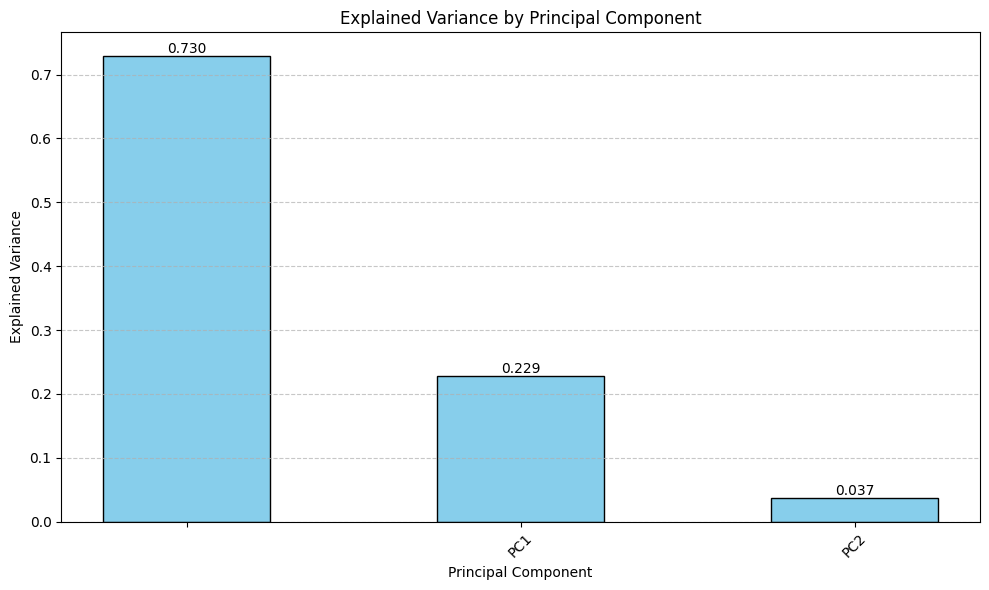

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(df_explained_variance['PC'], df_explained_variance['Explained Variance'], 
        width=0.5, color='skyblue', edgecolor='black')

# Add data labels
for i, val in enumerate(df_explained_variance['Explained Variance']):
    plt.text(i, val, f'{val:.3f}', ha='center', va='bottom')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


**Plot the same graph but with an addition. The total explained variance of PC1, then PC1+PC2 then finally PC1+PC2+PC3 (as calculated above)**

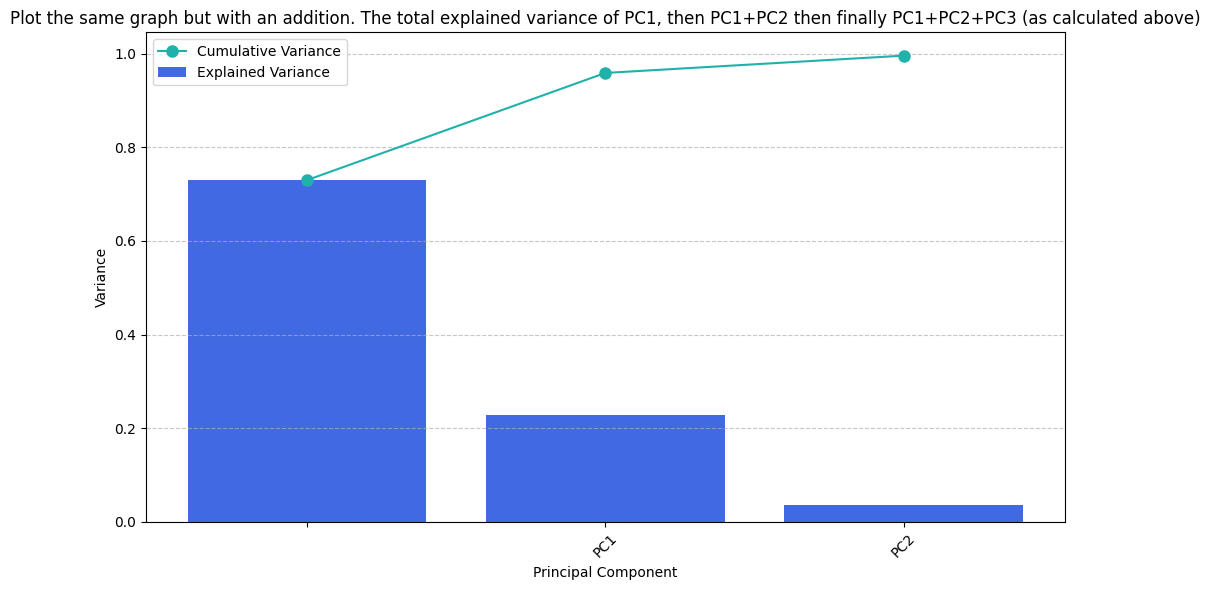

In [58]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Plot cumulative variance as a line plot
ax.plot(df_explained_variance['PC'], df_explained_variance['Cumulative Variance'], 
        marker='o', markersize=8, color='LightSeaGreen', label='Cumulative Variance')

# Plot explained variance as a bar plot
ax.bar(df_explained_variance['PC'], df_explained_variance['Explained Variance'], 
       color='RoyalBlue', label='Explained Variance')

# Set labels and title
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance')
ax.set_title('Plot the same graph but with an addition. The total explained variance of PC1, then PC1+PC2 then finally PC1+PC2+PC3 (as calculated above)')

# Add legend
ax.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


D:\Apps\Py\Lib\site-packages\matplotlib\collections.py:1109: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


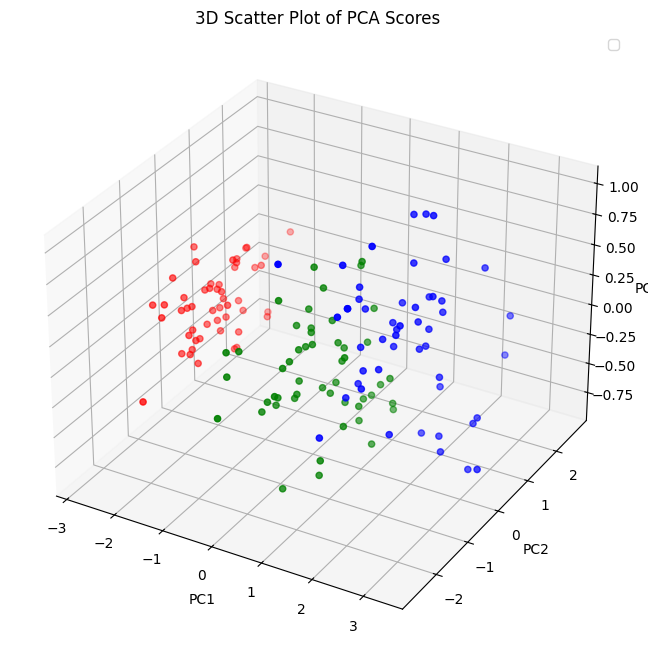

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a colormap for the species
colors = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}

# Map the species to colors
df_scores['Color'] = df_scores['Species'].map(colors)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with colors mapped to species
scatter = ax.scatter(df_scores['PC1'], df_scores['PC2'], df_scores['PC3'], c=df_scores['Color'])

# Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of PCA Scores')

# Add legend
ax.legend(handles=scatter.legend_elements()[0], labels=colors.keys())

plt.show()


**This plot intends to create a 3D scatter plot of PCA scores, where the x, y, and z axes represent the first three principal components (PC1, PC2, PC3). Each data point in the plot represents a sample from the dataset, and its position in the 3D space is determined by its scores on the three principal components.**